In [137]:
#전체 장르 분포 - 막대차트
#연도별 장르 분포 - 막대차트
#연도 별 장르 순위 변화 시각화 - 막대차트


#연도별 트렌드 장르 분석 , (해당 년도별 장르 분포 - 전체 년도별 장르 분포) 해서 내림차순하자 - 막대차트
#연도별 트렌드 가수 분석, 카운트 후 내림차순으로 정렬 후 데이터를 한 번 보자 - 막대차트 


#연도별 토픽 분석 - 막대차트
#토픽의 분포도를 살펴 보기 - 막대차트


In [149]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')  # 설치된 한글 폰트 이름

from colorama import Fore, Style, init

# colorama 초기화
init(autoreset=True)



data_path=r"C:\Users\hojun\2024_10_10_project\data\topic_data\topic_total_data.csv"

pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.width', None)  # 너비 제한 해제
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 해제

In [150]:
df=pd.read_csv(data_path)
print(df.columns)

Index(['song_year', 'song_rank', 'singer', 'title', 'Genre', 'lyric',
       'lyric_tokens', 'topic', 'topic_pr'],
      dtype='object')


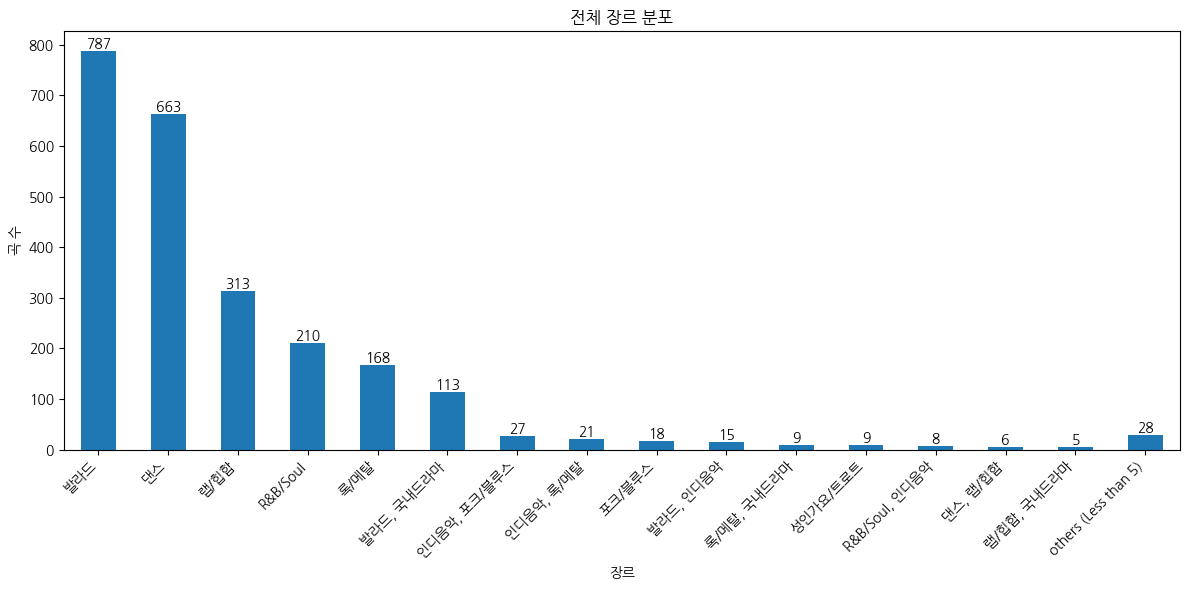

In [140]:
#전체 장르 분포 - 막대차트

# 장르 빈도수 계산
genre_counts = df['Genre'].value_counts()


#5개 이하의 장르를 하나로 합치기
etc=genre_counts[genre_counts<5].sum()
genre_counts=genre_counts[genre_counts >= 5]
genre_counts['others (Less than 5)']=etc

# 막대 차트 생성
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')

plt.title('전체 장르 분포')
plt.xlabel('장르')
plt.ylabel('곡 수')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(genre_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 전체 장르 분석

발라드, 댄스, 랩/힙합, R&B/soul, 록/메탈, {발라드, 국내드라마(ost)}이 6개의 장르들이 전체 비율의 약 94%를 차지하고 있다.


발라드, 국내드라마처럼 두 가지의 장르를 가진 곡들이 있다., 이 것을 분리해서 따로 봐야할까 고민했지만
음악의 장르 중에는 음악의 형식에 대한 분류도 있지만 인디음악 처럼 퍼플리셔가 기준이기도 하고 국내드라마(ost)처럼 사용처를 기준으로 분류한 장르도 있기 때문에 단순히 분리하는 것 보다는 이처럼 하나로 묶는편이 좋다고 생각했다.


C:\Users\hojun\AppData\Local\Temp\ipykernel_26092\3688069395.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres_by_year = df.groupby('song_year').apply(get_top_5_genres_percentage).unstack()


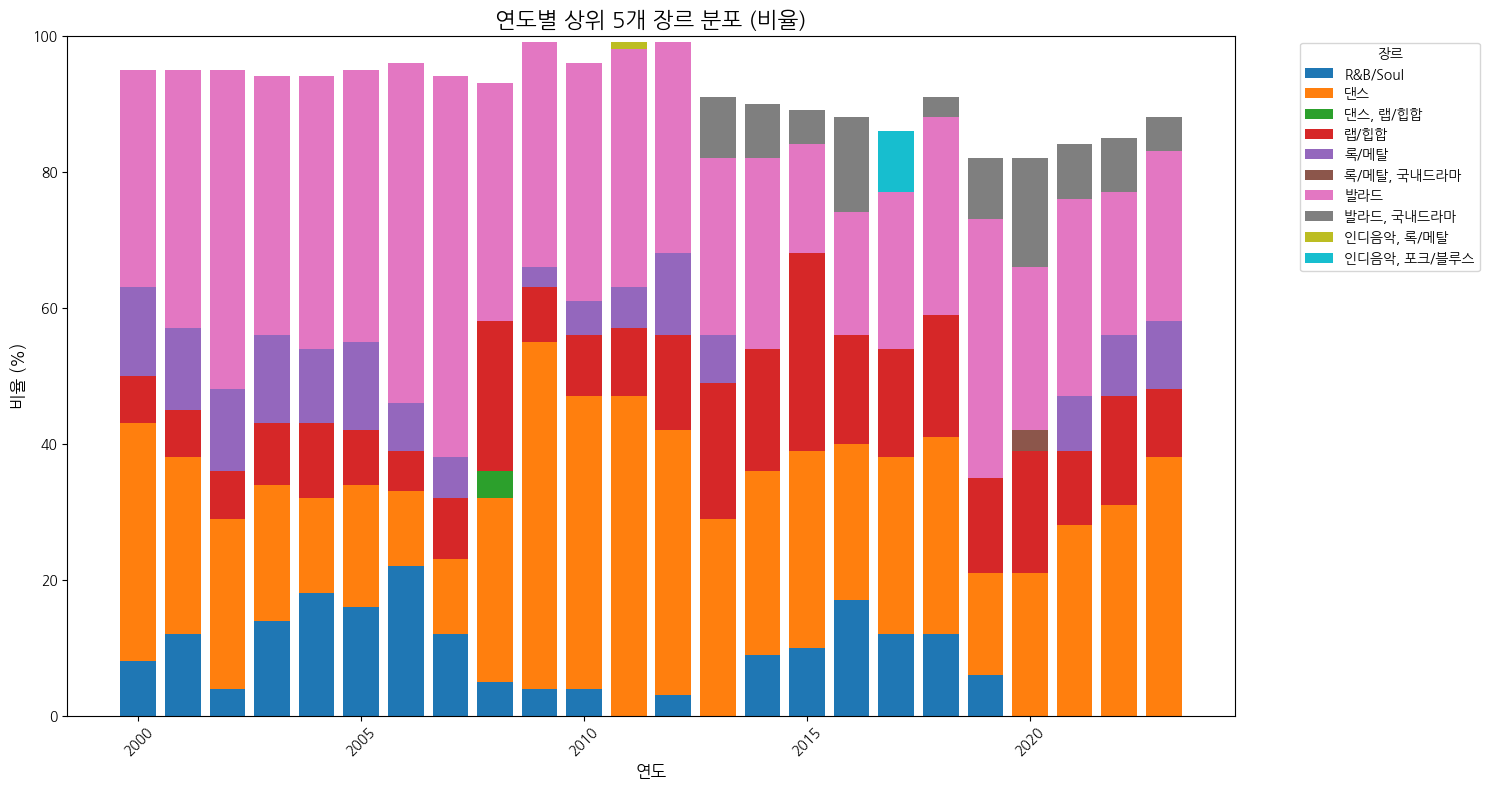

In [141]:


# 연도별 상위 5개 장르 추출 및 비율 계산
def get_top_5_genres_percentage(group):
    total = len(group)
    return (group['Genre'].value_counts().nlargest(5) / total * 100).round(2)

# 연도별 장르 비율 계산
genres_by_year = df.groupby('song_year').apply(get_top_5_genres_percentage).unstack()

# 결측값을 0으로 채우기
genres_by_year = genres_by_year.fillna(0)

# 그래프 그리기
plt.figure(figsize=(15, 8))
bottom = pd.Series(0, index=genres_by_year.index)

for genre in genres_by_year.columns:
    plt.bar(genres_by_year.index, genres_by_year[genre], bottom=bottom, label=genre)
    bottom += genres_by_year[genre]

plt.title('연도별 상위 5개 장르 분포 (비율)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.ylim(0, 100)  # y축 범위를 0%에서 100%로 설정
plt.tight_layout()
plt.show()

### 연도별 상위 5개 장르 분석

전체적인 비율은 비슷하지만 2012년도 이후로 ost 장르가 상위 장르로 등장하고 꾸준하게 사랑을 받았다.

또한 발라드, 댄스, 랩/힙합, 록/메탈 장르들은 꾸준하게 사랑을 받고 있는 반면 R&B/soul 장르는 2010년도 이후로 오르내리는 추이를 보이다. 2020년 이후로는 상위 5개 장르에서 사라졌다.

In [142]:
import pandas as pd
from IPython.display import display, HTML

# 전체 장르 분포 계산
total_genre_dist = df['Genre'].value_counts(normalize=True)

# 연도별 장르 분포 계산 함수
def get_year_genre_dist(group):
    return group['Genre'].value_counts(normalize=True)

# 연도별 트렌드 점수 계산 함수
def calculate_trend_score(year_dist):
    return year_dist - total_genre_dist

# 연도별 트렌드 점수 계산 적용
trend_scores = df.groupby('song_year').apply(lambda x: calculate_trend_score(get_year_genre_dist(x)))

# 트렌드 점수가 2% 이상이거나 -2% 이하인 장르 추출 함수
def get_2_pr_trends(year_trend, threshold=0.02):
    significant = year_trend[(year_trend >= threshold) | (year_trend <= -threshold)]
    return significant.sort_values(ascending=False)

# 연도별 주요 트렌드 지수 출력 함수
def print_yearly_trends(start_year, end_year):

    results = []
    results.append("<h3> 여기서 사용된 트렌드 지수란, 2000~2023년도 장르의 평균 분포와 해당 년도의 장르의 분포 차이를 수치화 한 것을 의미한다.</h3>")
    results.append("<h3> 이러한 계산 방식을 사용한 이유는 사람들의 선호도에 의한 장르 분포는 년도 마다 큰 틀이 크게 달라지지 않는다고 분석했다. 그렇기 때문에 이 큰 틀에서 살짝 벗어나는 부분을 트렌드(유행)이라고 판단했다..</h3>")
    for year in range(start_year, end_year + 1):
        year_trend = trend_scores.loc[year]
        trends_2_pr = get_2_pr_trends(year_trend)
        
        if not trends_2_pr.empty:
            year_results = [f"<h3>{year}년 주요 트렌드 지수:</h3>"]
            for genre, score in trends_2_pr.items():
                if score > 0:
                    trend_str = genre+f"<span style='color: red;'>: {score*100:.2f}% </span>"
                else:
                    trend_str = genre+f"<span style='color: blue;'>: {score*100:.2f}% </span>"
                year_results.append(trend_str)
            results.append("<br>".join(year_results))
        else:
            results.append(f"<p>{year}년: 주목할 만한 트렌드 없음</p>")

    
    display(HTML("<br><br>".join(results)))

# 예시: 2000년부터 2023년까지의 주요 트렌드 출력
print_yearly_trends(2000, 2023)

C:\Users\hojun\AppData\Local\Temp\ipykernel_26092\1135298975.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_scores = df.groupby('song_year').apply(lambda x: calculate_trend_score(get_year_genre_dist(x)))



위 결과에서 한 가지 재밌는 점은 2020년도 지표에 트로트가 나타났다는 것이다. 
이는 2020년 미스터트로트의 흥행으로 멜론 차트에서도 트로트 열풍의 영향이 끼친 듯 하다.

상위 20개 가수:
singer
아이유                    51
방탄소년단                  42
BIGBANG (빅뱅)           37
SG 워너비                 27
다비치                    26
버스커 버스커                20
임영웅                    20
2NE1                   19
성시경                    19
엠씨더맥스 (M.C the MAX)    19
AKMU (악뮤)              18
MC몽                    18
볼빨간사춘기                 18
백지영                    18
박효신                    17
폴킴                     17
TWICE (트와이스)           17
BLACKPINK              16
이승기                    16
임창정                    16
Name: count, dtype: int64
1곡만 있는 가수 수: 318
1곡만 있는 가수 비율: 45.69%


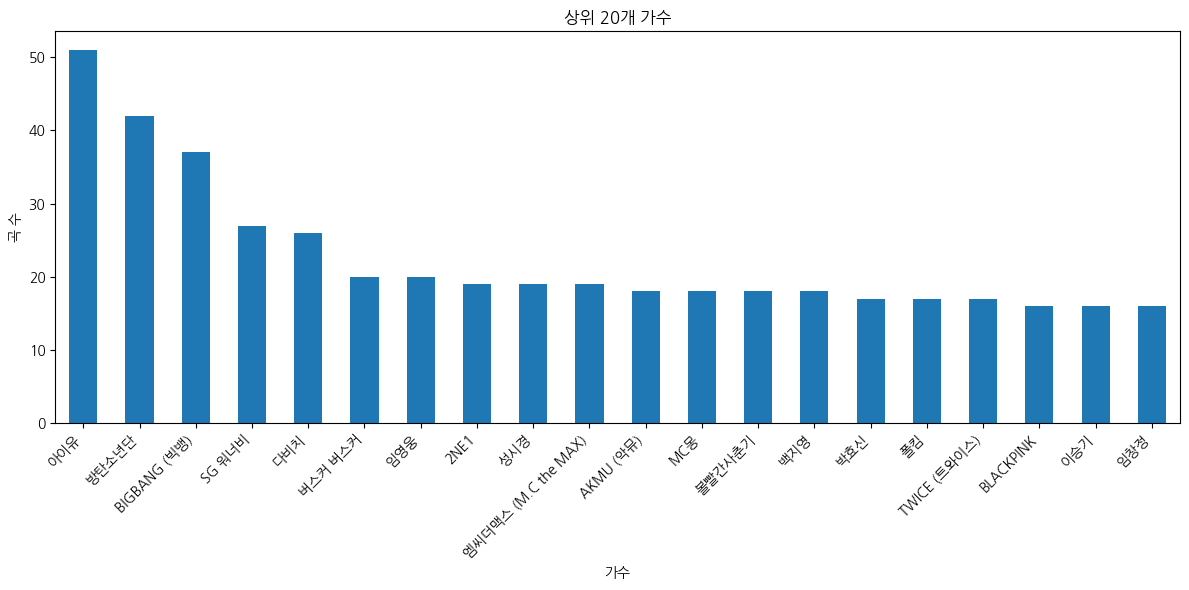

In [148]:
# 가수 내림차순 정렬
singer_counts = df['singer'].value_counts()

# 상위 20개 가수 출력
print("상위 20개 가수:")
print(singer_counts.head(20))

# 전체 가수 수와 1곡만 있는 가수 수 계산
total_singer = len(singer_counts)
one_hit_wonders = len(singer_counts[singer_counts == 1])

print(f"1곡만 있는 가수 수: {one_hit_wonders}")
print(f"1곡만 있는 가수 비율: {one_hit_wonders/total_singer:.2%}")

# 상위 20개 가수 시각화
plt.figure(figsize=(12, 6))
singer_counts.head(20).plot(kind='bar')
plt.title('상위 20개 가수')
plt.xlabel('가수')
plt.ylabel('곡 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [144]:
# 'title'과 'singer'를 기준으로 중복 행 찾기
duplicates = df[df.duplicated(subset=['title', 'singer'], keep=False)]

# 중복된 행을 'title'과 'singer'로 정렬
duplicates_sorted = duplicates.sort_values(['title', 'singer'])

# 중복이 가장 많은 곡 찾기
most_duplicated = duplicates_sorted.groupby(['title', 'singer']).size().sort_values(ascending=False)

print("\n가장 많이 중복된 곡 (상위 10개):")

top_10_most_duplicated=most_duplicated.head(10)

results = []
for (title, singer), count in top_10_most_duplicated.items():
    years = sorted(df[(df['title'] == title) & (df['singer'] == singer)]['song_year'].unique())
    print(f"제목: {title}")
    print(f"가수: {singer}")
    print(f"중복 횟수: {count}")
    print(f"등장 년도: {years}")

    print("-" * 50)





가장 많이 중복된 곡 (상위 10개):
제목: 봄날
가수: 방탄소년단
중복 횟수: 7
등장 년도: [2017, 2018, 2019, 2020, 2021, 2022, 2023]
--------------------------------------------------
제목: 모든 날, 모든 순간 (Every day, Every Moment)
가수: 폴킴
중복 횟수: 6
등장 년도: [2018, 2019, 2020, 2021, 2022, 2023]
--------------------------------------------------
제목: 벚꽃 엔딩
가수: 버스커 버스커
중복 횟수: 5
등장 년도: [2012, 2013, 2014, 2015, 2016]
--------------------------------------------------
제목: 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
가수: AKMU (악뮤)
중복 횟수: 5
등장 년도: [2019, 2020, 2021, 2022, 2023]
--------------------------------------------------
제목: 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)
가수: 마크툽 (MAKTUB)
중복 횟수: 4
등장 년도: [2019, 2020, 2021, 2022]
--------------------------------------------------
제목: Dynamite
가수: 방탄소년단
중복 횟수: 4
등장 년도: [2020, 2021, 2022, 2023]
--------------------------------------------------
제목: 이제 나만 믿어요
가수: 임영웅
중복 횟수: 4
등장 년도: [2020, 2021, 2022, 2023]
--------------------------------------------------
제목: 너를 만나
가수: 폴킴
중복 횟수: 4
등장 년도: [2018, 2019, 2020, 

In [136]:
topics = [
    "관계와 후회",         # Topic 0
    "고독과 그리움",       # Topic 1
    "불안과 거짓",         # Topic 2
    "삶과 감정",           # Topic 3
    "사랑의 끝과 소중함"   # Topic 4
]


# 토픽의 주제를 다음과 같이 임의로 정리함
topic_df = df.drop_duplicates(subset=['title'])

#토픽별로 topic_pr이 가장 높은 3곡으로 보여줌
for topic in range(len(topic_df['topic'].unique())):
    print('Topic #', topics[topic], topic, '-----------------------------')
    top_pr_topics = topic_df[topic_df['topic'] == topic].sort_values(by='topic_pr', ascending=False)
    print(top_pr_topics['title'].iloc[0])
    print(top_pr_topics['title'].iloc[1])
    print(top_pr_topics['title'].iloc[2], '\n')


Topic # 관계와 후회 0 -----------------------------
연애소설 (Feat. 아이유)
Suddenly
...사랑했잖아... 

Topic # 고독과 그리움 1 -----------------------------
내 입술... 따뜻한 커피처럼
이별이 온다
취중고백 

Topic # 불안과 거짓 2 -----------------------------
다정히 내 이름을 부르면
나란 놈은 답은 너다 (Feat. 하림)
CALL ME BABY 

Topic # 삶과 감정 3 -----------------------------
한여름밤의 꿀
기다렸다 가
빌었어 

Topic # 사랑의 끝과 소중함 4 -----------------------------
자니 (Feat. Dynamic Duo)
화장 지웠어 (Feat. Zion.T, HA:TFELT) (No Make Up)
요즘것들 (Feat. ZICO, DEAN) 



<Figure size 1500x800 with 0 Axes>

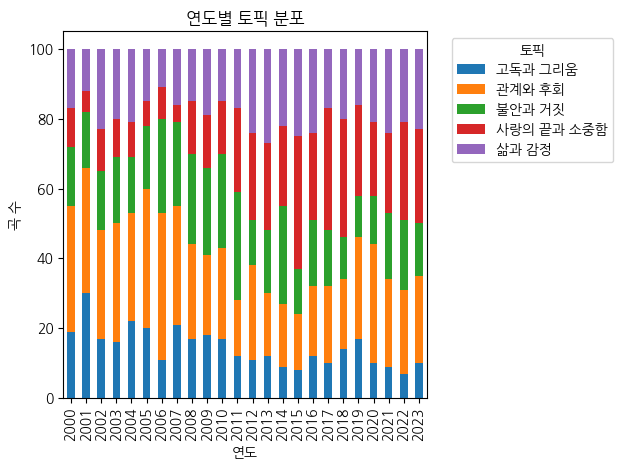

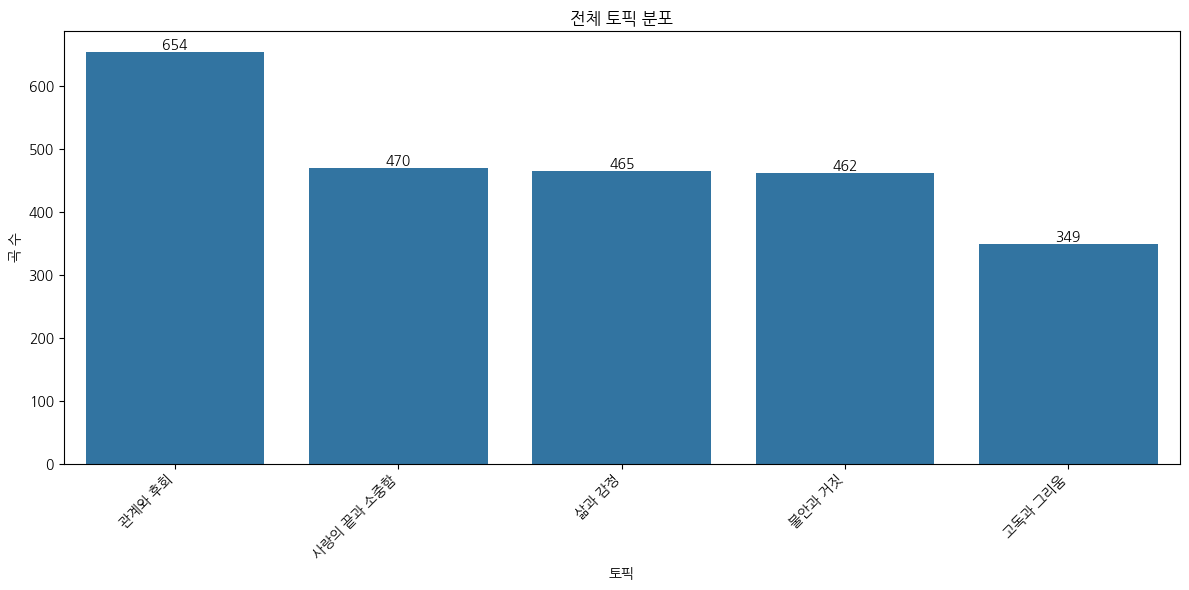

In [145]:
import seaborn as sns

# 토픽 번호를 이름으로 매핑
topic_names = {i: name for i, name in enumerate(topics)}

# DataFrame의 'topic' 열을 이름으로 변환
df['topic_name'] = df['topic'].map(topic_names)

# 1. 연도별 토픽 분석 - 막대차트
plt.figure(figsize=(15, 8))
topic_by_year = df.groupby(['song_year', 'topic_name']).size().unstack(fill_value=0)
topic_by_year.plot(kind='bar', stacked=True)
plt.title('연도별 토픽 분포')
plt.xlabel('연도')
plt.ylabel('곡 수')
plt.legend(title='토픽', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 전체 토픽 분포도 - 막대차트
plt.figure(figsize=(12, 6))
topic_counts = df['topic_name'].value_counts()
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('전체 토픽 분포')
plt.xlabel('토픽')
plt.ylabel('곡 수')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(topic_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [151]:

topic_genre_df = pd.crosstab(df['topic'], df['Genre'])

# 각 토픽별 가장 흔한 장르 출력
print("각 토픽별 가장 흔한 장르:")
for topic in topic_genre_df.index:
    top_genre = topic_genre_df.loc[topic].idxmax()
    print(f"토픽: {topics[topic]}, 가장 흔한 장르: {top_genre}")

각 토픽별 가장 흔한 장르:
토픽: 관계와 후회, 가장 흔한 장르: 발라드
토픽: 고독과 그리움, 가장 흔한 장르: 발라드


토픽: 불안과 거짓, 가장 흔한 장르: 댄스
토픽: 삶과 감정, 가장 흔한 장르: 댄스
토픽: 사랑의 끝과 소중함, 가장 흔한 장르: 댄스


In [152]:
# 각 장르별 가장 흔한 토픽 출력
genre_topic_cross = pd.crosstab(df['Genre'], df['topic'])
print("\n각 장르별 가장 흔한 토픽:")
for genre in genre_topic_cross.index:
    top_topic = topics[ genre_topic_cross.loc[genre].idxmax()]
    print(f"장르: {genre}, 가장 흔한 토픽: {top_topic}")


각 장르별 가장 흔한 토픽:
장르: -, 가장 흔한 토픽: 관계와 후회
장르: POP, 가장 흔한 토픽: 관계와 후회
장르: R&B/Soul, 가장 흔한 토픽: 관계와 후회
장르: R&B/Soul, 국내드라마, 가장 흔한 토픽: 관계와 후회
장르: R&B/Soul, 인디음악, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 국내드라마, 가장 흔한 토픽: 관계와 후회
장르: 댄스, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 댄스, 랩/힙합, 가장 흔한 토픽: 관계와 후회
장르: 랩/힙합, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 랩/힙합, 국내드라마, 가장 흔한 토픽: 불안과 거짓
장르: 랩/힙합, 인디음악, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 록/메탈, 가장 흔한 토픽: 관계와 후회
장르: 록/메탈, 국내드라마, 가장 흔한 토픽: 불안과 거짓
장르: 록/메탈, 국내영화, 가장 흔한 토픽: 불안과 거짓
장르: 발라드, 가장 흔한 토픽: 관계와 후회
장르: 발라드, 국내드라마, 가장 흔한 토픽: 관계와 후회
장르: 발라드, 국내영화, 가장 흔한 토픽: 관계와 후회
장르: 발라드, 댄스, 가장 흔한 토픽: 관계와 후회
장르: 발라드, 랩/힙합, 국내드라마, 가장 흔한 토픽: 삶과 감정
장르: 발라드, 록/메탈, 가장 흔한 토픽: 관계와 후회
장르: 발라드, 인디음악, 가장 흔한 토픽: 관계와 후회
장르: 성인가요/트로트, 가장 흔한 토픽: 삶과 감정
장르: 인디음악, 록/메탈, 가장 흔한 토픽: 삶과 감정
장르: 인디음악, 일렉트로니카, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 인디음악, 포크/블루스, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 일렉트로니카, 가장 흔한 토픽: 관계와 후회
장르: 일렉트로니카, 국내드라마, 가장 흔한 토픽: 불안과 거짓
장르: 포크/블루스, 가장 흔한 토픽: 사랑의 끝과 소중함
장르: 포크/블루스, 국내드라마, 가장 흔한 토픽: 관계와 후회
